In [2]:
#Answering Question 1 
#Importing Necessary Packages/Data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! pwd

/sfs/weka/scratch/khs2fu


In [4]:
#Part 1 Average Prices
df = pd.read_csv('/sfs/weka/scratch/khs2fu/DS 3001/Q1_clean (1).csv')
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

In [5]:
#Manhattan is the most expensive on average 183 per night aswell as the highest maximum of 10000, twice the nearest neighborhood.

In [6]:
#Part 1 Average Scores 
df.loc[:,['Review Scores Rating','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Review Scores Rating                                         \
                              count       mean       std   min   25%   50%   
Neighbourhood                                                                
Bronx                         217.0  91.654378  8.169239  60.0  88.0  93.0   
Brooklyn                     8487.0  92.363497  8.656563  20.0  90.0  94.0   
Manhattan                   11763.0  91.801496  8.840889  20.0  88.0  93.0   
Queens                       1590.0  91.549057  9.895860  20.0  88.0  94.0   
Staten Island                  96.0  90.843750  9.137923  40.0  87.0  92.0   

                              
                  75%    max  
Neighbourhood                 
Bronx            99.0  100.0  
Brooklyn        100.0  100.0  
Manhattan        99.0  100.0  
Queens          100.0  100.0  
Staten Island    97.0  100.0

In [7]:
#There is less variation in terms of ratings for reiveiws by neightborhood, Brooklyn has a slightly higher average than others. 

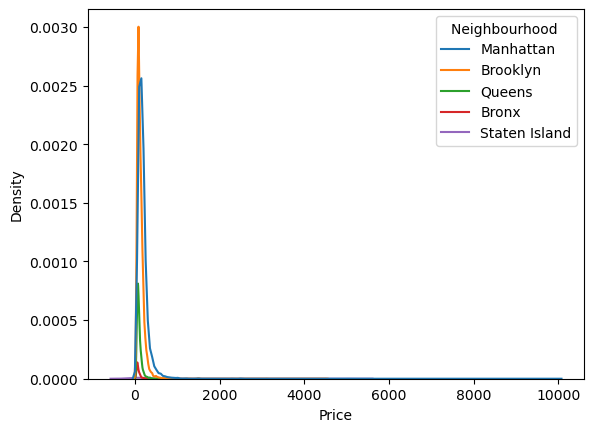

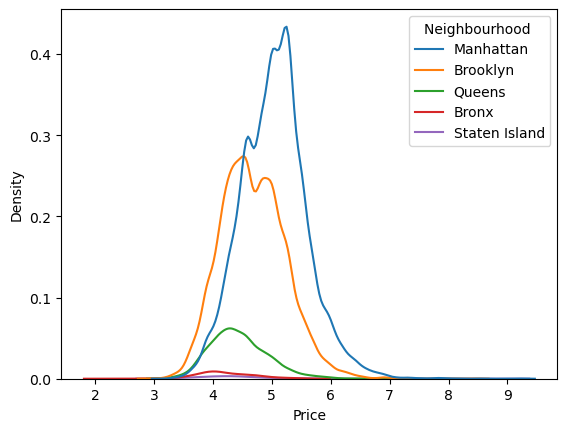

In [13]:
#Part 1 Kernal Denisty Plots 
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()


In [9]:
#The kernal density plots reveal the extent to which Manhattan's prices are higher than other neighborhoods not just on average compared to the other neighborhoods 

In [14]:
#Part 2 Regressing Neighbourhood 
y = df['Price']
x = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(x,y) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print(results)

        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


In [15]:
#The coefficients are the exact same as the values price means for each neighbourhood. This makes sense though because this model only includes price as the y predicted by the neighbourhood dummy variable.   

In [16]:
#Part 3 
y = df['Price']
x = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x,y) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print(results)
print(reg.intercept_)

        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
75.27649769585337


In [17]:
#The Bronx variable is dropped from the results and becomes the intercept (75.27), this changes the rest of the coefficients because now they are relative to the Bronx.

In [18]:
#Part 4 Splitting the sample/running regression  
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) 

Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) 

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) 

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

Rsq:  0.06701086106947296
RMSE:  125.01092061382933
               variable  coefficient
0  Review Scores Rating     1.032257
1                 Bronx   -17.261392
2              Brooklyn    32.180888
3             Manhattan    89.421020
4                Queens     4.050208
5         Staten Island    61.576393


In [19]:
#The most expensive rental will come from manhattan and can be calculated by 100 rating * rating coefficient (1.032) + 89.42 which comes out to around 192 per night

In [21]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print(results)

KeyError: 'Neighbourhood'

In [ ]:
#Couldn't understand the key error believe the spelling is correct and the similar code above ran no problem.

In [ ]:
#Part 6
#I was unable to run part 5, however the coefficient is expected to change as the model takes into account more variables because the model now is completely different instead of the part 4 version which relies on rating alone, some of the variation in price will be explained in the new model by other variables. 

In [25]:
#Question 3
df2 = pd.read_csv('/sfs/weka/scratch/khs2fu/DS 3001/wages_hw.csv')
df2.head()

,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
2,3,4.8,501 to 1000 employees,Business Services,85.0,FL
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY


In [32]:
np.random.seed(1000)

N = df2.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[train_size]
test_rows = index[train_size]

y = df2['avg_salary']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

In [33]:
from sklearn import linear_model

dummies = pd.get_dummies(df2.loc[:,'Sector'], dtype=int)
X_train = dummies.iloc[train_rows]
X_test = dummies.iloc[test_rows]
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat = reg.predict(X_test)


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
print('The Rsq is: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('The RMSE is: ', rmse) 

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Unsure of how to address this value error 

<Axes: xlabel='Rating', ylabel='avg_salary'>

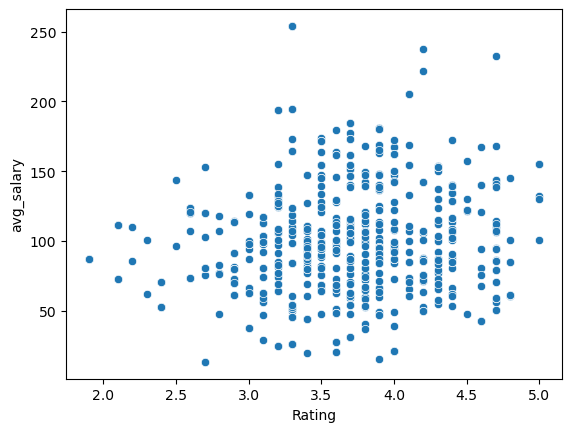

In [36]:
#Part 3 
sns.scatterplot(data=df2,x='Rating',y='avg_salary')

In [ ]:
#The scatter plot does not appear to have any distinguishable pattern, maybe there is a slight relationship between higher ratings and higher average salary. In trying to run a regression wiht the one hot encoded variable I got another key error I can't seem to resolve, but I would expect the r squared and RSME for that model to be much better than the above scatter plot. 

In [40]:
#Part 4 
df2['SxR'] = df2.loc[:,'Sector'] + 'X' + df2.loc[:,'Rating'].astype(str)
dummies = pd.get_dummies(df2.loc[:,'SxR'], dtype=int ) 

dummies_train = dummies.iloc[train_rows,:]
reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) 
rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
print(rdf.sort_values(by='slope',axis=0).to_string())

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Still unsure of what is causing these value a